In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import os    
os.environ['KMP_DUPLICATE_LIB_OK']='True'

# Hyper Parameters
input_size = 1
output_size = 1
num_epochs = 60
learning_rate = 0.001

# Toy dataset
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

# Linear regression model
model = nn.Linear(input_size, output_size)

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    inputs = torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)
    
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 5 == 0:
        print(f'Epoch [{epoch+1/num_epochs}], Loss: {loss.item():.4f}')

Epoch [4.016666666666667], Loss: 20.8377
Epoch [9.016666666666667], Loss: 8.5580
Epoch [14.016666666666667], Loss: 3.5833
Epoch [19.016666666666666], Loss: 1.5679
Epoch [24.016666666666666], Loss: 0.7514
Epoch [29.016666666666666], Loss: 0.4206
Epoch [34.016666666666666], Loss: 0.2865
Epoch [39.016666666666666], Loss: 0.2322
Epoch [44.016666666666666], Loss: 0.2101
Epoch [49.016666666666666], Loss: 0.2011
Epoch [54.016666666666666], Loss: 0.1974
Epoch [59.016666666666666], Loss: 0.1959


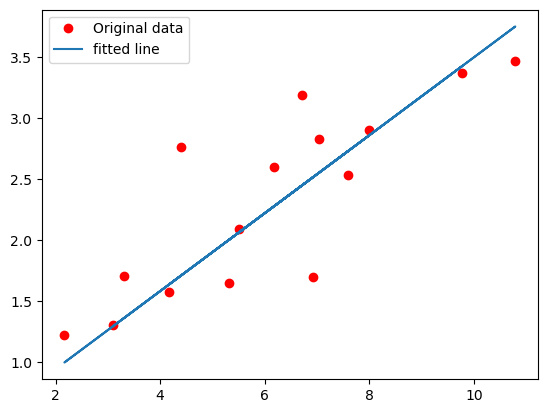

In [2]:
predicted = model(torch.from_numpy(x_train)).detach().numpy()
plt.plot(x_train, y_train, 'ro', label="Original data")
plt.plot(x_train, predicted, label="fitted line")
plt.legend()
plt.show()
